In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic/train.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Переменная  | Определение          | Ключ                                                       |
|-------------|---------------------|------------------------------------------------------------|
| survival    | Выживание           | 0 = Нет, 1 = Да                                            |
| pclass      | Класс билета         | 1 = Первый класс, 2 = Второй класс, 3 = Третий класс        |
| sex         | Пол                 |                                                            |
| Age         | Возраст в годах      |                                                            |
| sibsp       | Кол-во братьев/сестер/супругов на борту Титаника       |                                                            |
| parch       | Кол-во родителей/детей на борту Титаника               |                                                            |
| ticket      | Номер билета         |                                                            |
| fare        | Стоимость билета     |                                                            |
| cabin       | Номер каюты          |                                                            |
| embarked    | Порт посадки         | C = Шербур, Q = Квинстаун, S = Саутгемптон                 |

**Примечания к переменным:**

pclass: Прокси-индикатор социально-экономического статуса (SES)
 - 1st = Высокий
 - 2nd = Средний
 - 3rd = Низкий
age: Возраст представлен в десятичных долях, если меньше 1. Если возраст приближенный, то указан в формате xx.5

sibsp: В наборе данных семейные отношения определены следующим образом
 - SibSp = Брат, сестра, сводный брат, сводная сестра
 - Spouse = Муж, жена (любовницы и помолвленные были исключены)

parch: В наборе данных семейные отношения определены следующим образом
 - Parch = Мать, отец
 - Child = Дочь, сын, сводная дочь, сводный сын

Некоторые дети путешествовали только с няней, поэтому для них parch=0.


In [4]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


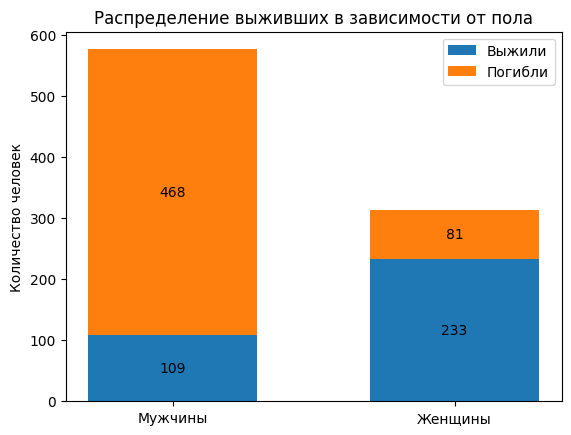

In [5]:


# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(titanic.loc[(titanic['Sex'] == 'male')])
females_total = len(titanic.loc[(titanic['Sex'] == 'female')])
males_survived = len(titanic.loc[((titanic['Sex'] == 'male') & (titanic['Survived'] == 1))])
females_survived = len(titanic.loc[((titanic['Sex'] == 'female') & (titanic['Survived'] == 1))])

#
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

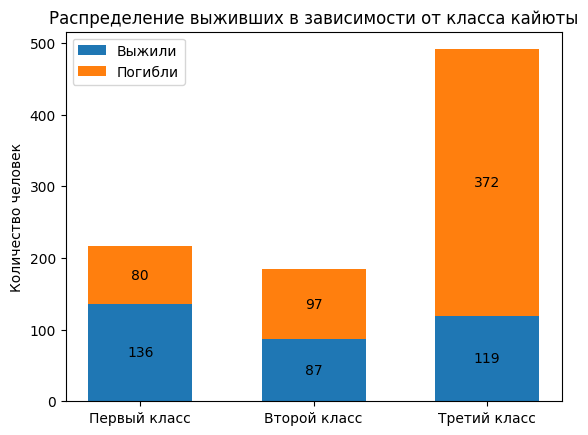

In [6]:
# Посчитаем выживших мужчин и женщин в зависимости от класса кайюты
first_class = len(titanic.loc[(titanic['Pclass'] == 1)])
second_class = len(titanic.loc[(titanic['Pclass'] == 2)])
third_class = len(titanic.loc[((titanic['Pclass'] == 3))])
survived_first_class = len(titanic.loc[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)])
survived_second_class = len(titanic.loc[(titanic['Pclass'] == 2) & (titanic['Survived'] == 1)])
survived_third_class = len(titanic.loc[(titanic['Pclass'] == 3) & (titanic['Survived'] == 1)])

survivors_counts = {
    'Выжили': [survived_first_class, survived_second_class, survived_third_class ],
    'Погибли': [first_class-survived_first_class, second_class-survived_second_class, third_class-survived_third_class]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('Первый класс', 'Второй класс', 'Третий класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса кайюты')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Исходя из этих данных пол и класс каюты будут одними из ключевых факторов (и признаков для модели), влияющих на вероятность выжить.

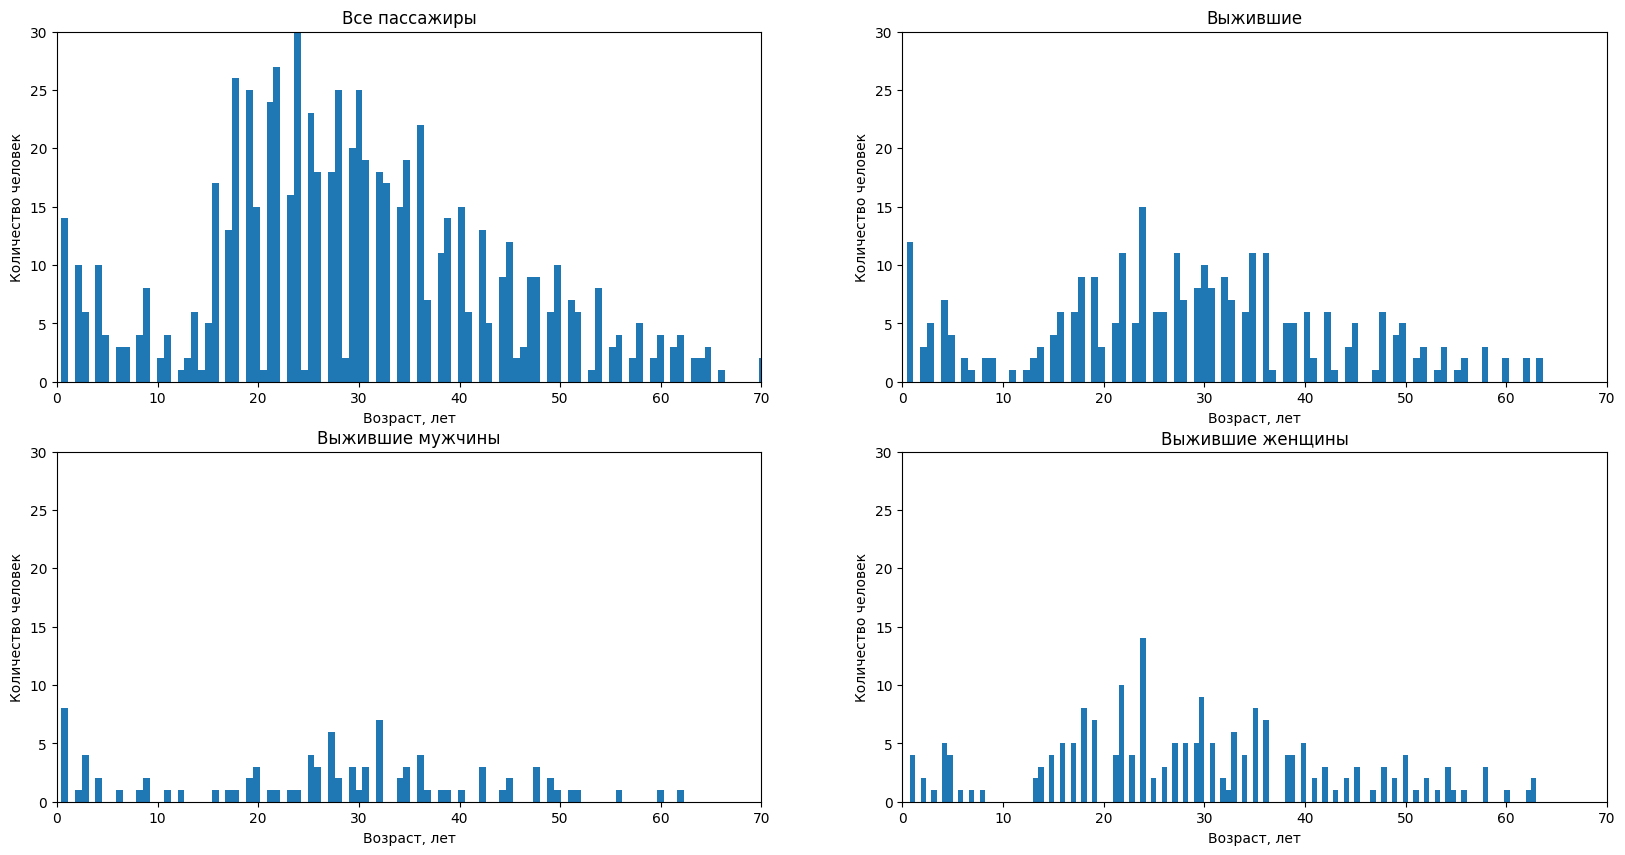

In [7]:
from collections import Counter

survivors = titanic.loc[(titanic['Survived'] == 1)]
male_survivors = titanic.loc[((titanic['Sex'] == 'male') & (titanic['Survived'] == 1))]
female_survivors = titanic.loc[((titanic['Sex'] == 'female') & (titanic['Survived'] == 1))]

num_of_ages = len(dict(Counter(survivors['Age'])).keys())

fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for index, surv in enumerate([[titanic, survivors], [male_survivors, female_survivors]]):
    for idx, subsurv in enumerate(surv):
        axs[index][idx].hist(subsurv['Age'], bins=num_of_ages)
        axs[index][idx].set_title(names[index][idx])
        axs[index][idx].set_xlabel('Возраст, лет')
        axs[index][idx].set_ylabel('Количество человек')
        axs[index][idx].set_ylim(0,30)
        axs[index][idx].set_xlim(0,70)
plt.show()

In [8]:
children = titanic.loc[((titanic['Age'] < np.float64(18.0)) & (titanic['Age'] > 0))]
survivors_children = titanic.loc[((titanic['Age'] < np.float64(18.0)) & (titanic['Survived'] == 1) & (titanic['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')


Пасажиров до 18 лет спаслось 53.98%


<Axes: >

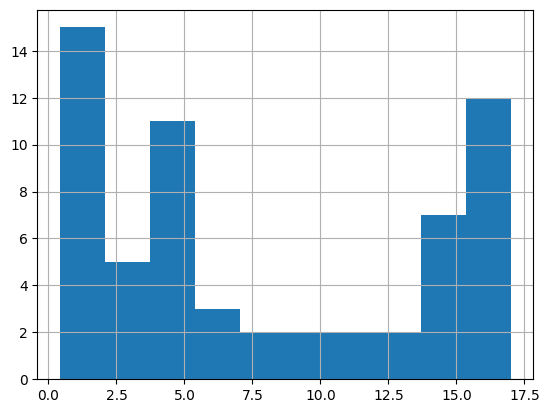

In [9]:
titanic.loc[((titanic['Survived'] == 1) & (titanic['Age'] > 0) & (titanic['Age'] < 18))].Age.hist()

Из графика видно больше всего спаслось детей до 5 лет

In [10]:
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
titanic['Titul'] = titanic['Name'].str.split(',').str[1].str.strip()
titanic['Titul'] = titanic['Titul'].str.split('.').str[0].str.strip()

In [12]:
titanic['Titul'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Titul
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


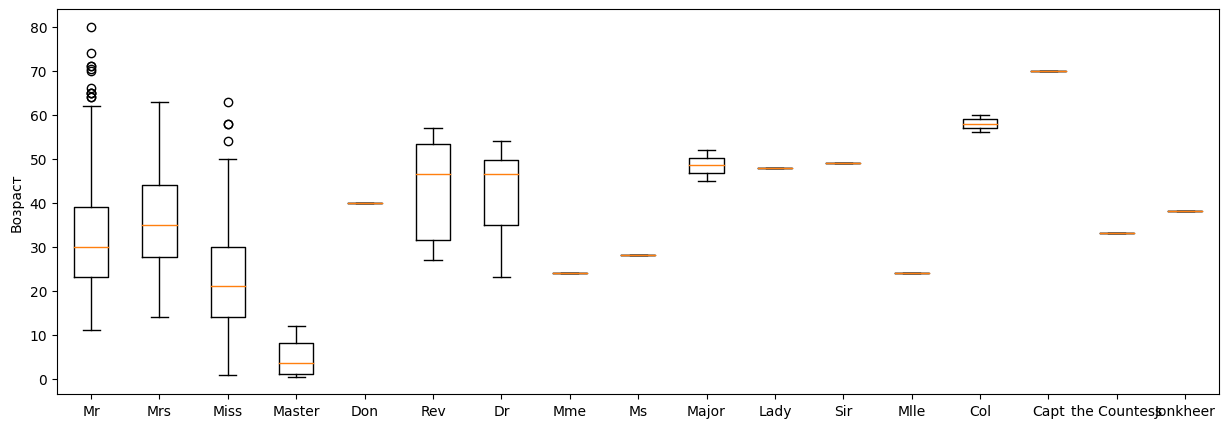

In [13]:
#Перечень титулов
titles = titanic['Titul'].unique().tolist()

#Создадим словарь с парами "титул: список возрастов"
ages = dict.fromkeys(titles, [])
for index, title in enumerate(titanic.Titul):
    if not pd.isna(titanic.Age[index]):
        ages[title] = ages[title] + [titanic.Age[index]]

fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(ages.values(), labels=titles, vert=True)
ax.set_ylabel('Возраст')
plt.show()

Cоотношение погибших и выживших среди пассажиров без возраста, а также на соотношение мужчин и женщин.

Text(0, 0.5, 'Кол-вол выживших')

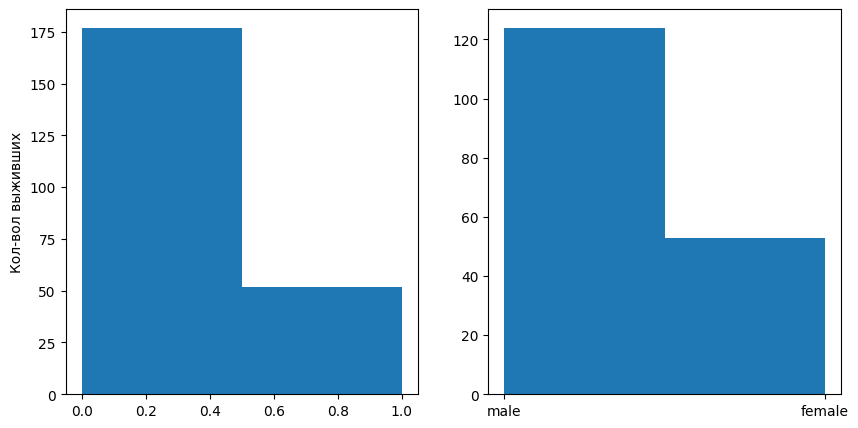

In [14]:
noage = titanic.loc[(pd.isna(titanic['Age']))]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(noage.Survived, bins=2, cumulative=-1)
ax[1].hist(noage.Sex, bins=2)
ax[0].set_ylabel('Кол-вол выживших')

In [15]:
for index, age in enumerate(titanic.Age):
    if pd.isna(age):
        titanic.Age[index] = np.median(ages[titanic.Titul[index]])

C:\Users\manda\AppData\Local\Temp\ipykernel_18384\1479885138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Age[index] = np.median(ages[titanic.Titul[index]])
C:\Users\manda\AppData\Local\Temp\ipykernel_18384\1479885138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Age[index] = np.median(ages[titanic.Titul[index]])
C:\Users\manda\AppData\Local\Temp\ipykernel_18384\1479885138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Titul        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [17]:
Counter(titanic['Titul'])

Counter({'Mr': 517,
         'Miss': 182,
         'Mrs': 125,
         'Master': 40,
         'Dr': 7,
         'Rev': 6,
         'Major': 2,
         'Mlle': 2,
         'Col': 2,
         'Don': 1,
         'Mme': 1,
         'Ms': 1,
         'Lady': 1,
         'Sir': 1,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1})

- 'Mr': Мистер (517)
- 'Miss': Мисс (182)
- 'Mrs': Миссис (125)
- 'Master': Мастер (40)
- 'Dr': Доктор (7)
- 'Rev': Реверенд (6)
- 'Major': Майор (2)
- 'Mlle': Мадемуазель (2)
- 'Col': Колонел (2)
- 'Don': Дон (1)
- 'Mme': Мадам (1)
- 'Ms': Мисс (1)
- 'Lady': Леди (1)
- 'Sir': Сэр (1)
- 'Capt': Капитан (1)
- 'the Countess': Графиня (1)
- 'Jonkheer': Джонкер (1)

Это общепринятые переводы титулов, объединяем схожие титулы в группы

C:\Users\manda\AppData\Local\Temp\ipykernel_18384\1309575906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Titul[index] = 'Majors'
C:\Users\manda\AppData\Local\Temp\ipykernel_18384\1309575906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Titul[index] = 'Majors'
C:\Users\manda\AppData\Local\Temp\ipykernel_18384\1309575906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Titul[index] = 'Majors'
C:\U

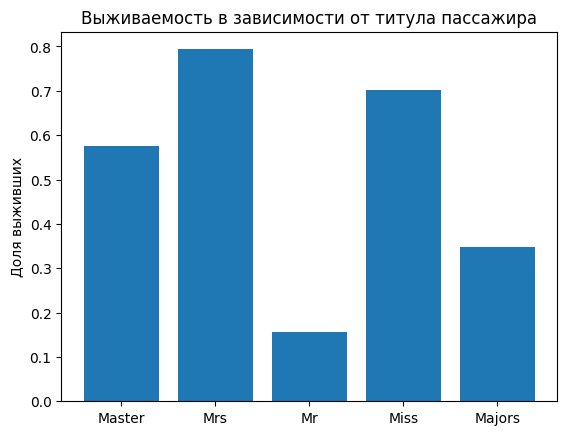

In [18]:
majors = ("Capt", "Col", "Don", "Dr",
                "Jonkheer", "Lady", "Major",
                "Rev", "Sir", "the Countess")
mrs = ("Ms")
miss = ("Mlle", 'Mme')

for index, title in enumerate(titanic.Titul):
    if title in majors:
        titanic.Titul[index] = 'Majors'
    elif title in miss:
        titanic.Titul[index] = 'Miss'
    elif title in mrs:
        titanic.Titul[index] = 'Mrs'

title_survive_percent = dict.fromkeys(set(titanic.Titul), None)
for title in title_survive_percent.keys():
    title_survive_percent[title] = len(titanic.loc[((titanic['Titul'] == title) & (titanic['Survived'] == 1))]) / len(titanic.loc[(titanic['Titul'] == title)])

fig, ax = plt.subplots()
ax.bar(title_survive_percent.keys(), title_survive_percent.values())
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от титула пассажира')
plt.show()

Титул даёт информацию о вероятности выжить, нужен для построении модели.

Выделяем пассажиров которые были одни на борту и с семьей (мама, папа, брат, сестра, муж, жена, дети)

In [19]:
titanic['Family'] = 0

for index, row in titanic.iterrows():
    sib_sp = row['SibSp']
    parch = row['Parch']
    
    if sib_sp != 0 and parch != 0:
        titanic.at[index, 'Family'] = int(1)

In [20]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titul,Family
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C,Mr,0
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,Miss,1
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,21.0,0,0,330909,7.6292,NaN,Q,Miss,0
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S,Mr,0
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S,Mrs,0
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,Mrs,0
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S,Mr,0
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,Mrs,1
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S,Miss,0
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Mr,0


<Axes: >

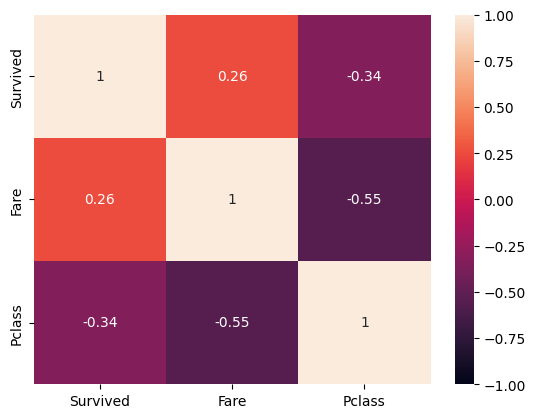

In [21]:
sns.heatmap(titanic[['Survived', 'Fare', 'Pclass']].corr(), annot=True, vmin=-1, vmax=1)

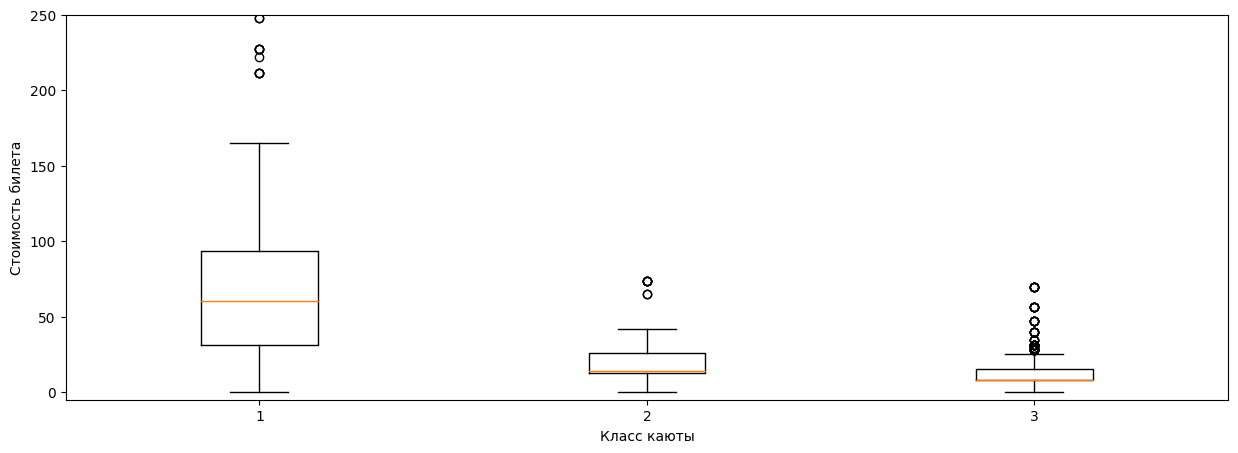

In [22]:
fare = dict.fromkeys((1,2,3), [])
for index, price in enumerate(titanic.Fare):
    fare[titanic.Pclass[index]] = fare[titanic.Pclass[index]] + [price]


fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(fare.values(), labels=(1,2,3), vert=True)
ax.set_ylabel('Стоимость билета')
ax.set_xlabel('Класс каюты')
ax.set_ylim(-5, 250)
plt.show()

In [23]:
for index, fare in enumerate(titanic.Fare):
    if np.isclose(fare, 0.0):
        pclass = titanic.Pclass[index]
        median_fare = np.median(titanic.Fare[titanic.Pclass == pclass])
        titanic.at[index, 'Fare'] = median_fare

In [24]:
for index, emb in enumerate(titanic.Embarked):
    if pd.isna(emb):
        print(titanic.iloc[index])
        titanic.Embarked[index] = 'S'

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Titul                         Miss
Family                           0
Name: 61, dtype: object
PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                        

C:\Users\manda\AppData\Local\Temp\ipykernel_18384\724479320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Embarked[index] = 'S'
C:\Users\manda\AppData\Local\Temp\ipykernel_18384\724479320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Embarked[index] = 'S'


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Titul        891 non-null    object 
 13  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


Удаляем лишние столбцы

 - PassengerId - id пассажира
 - Name - имя, нужную информацию уже извлекли из этой колонки и записали в Titul
 - SibSp, Parch - информация о семье, записали в Family
 - Cabin - скорее всего содержит нужную информацию, по которой так же можно оценить выживаемость, но данные отсутствуют и восстановить не получиться
 - Ticket - не нужная информация

In [26]:
columns_to_drop = ['PassengerId','Name','SibSp','Parch', 'Cabin', 'Ticket']
titanic_filter = titanic.drop(columns=columns_to_drop)


In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# Создание экземпляра OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Загрузка данных
# data = pd.read_csv("имя_твоего_файла.csv")

# Выбор категориальных признаков
categorical_features = ['Sex', 'Embarked', 'Titul']

# Выбор признаков для масштабирования
numeric_features = ['Age', 'Fare']

# Преобразование выбранных признаков
encoded_features = encoder.fit_transform(titanic_filter[categorical_features])

# Создание нового датафрейма с закодированными признаками
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Объединение нового датафрейма с исходными признаками
data_encoded = pd.concat([titanic_filter.drop(columns=categorical_features), encoded_df], axis=1)

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Масштабирование выбранных признаков
scaled_features = scaler.fit_transform(data_encoded[numeric_features])

# Создание нового датафрейма с масштабированными признаками
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features)

# Объединение нового датафрейма с исходными признаками
data_titanic = pd.concat([data_encoded.drop(columns=numeric_features), scaled_df], axis=1)


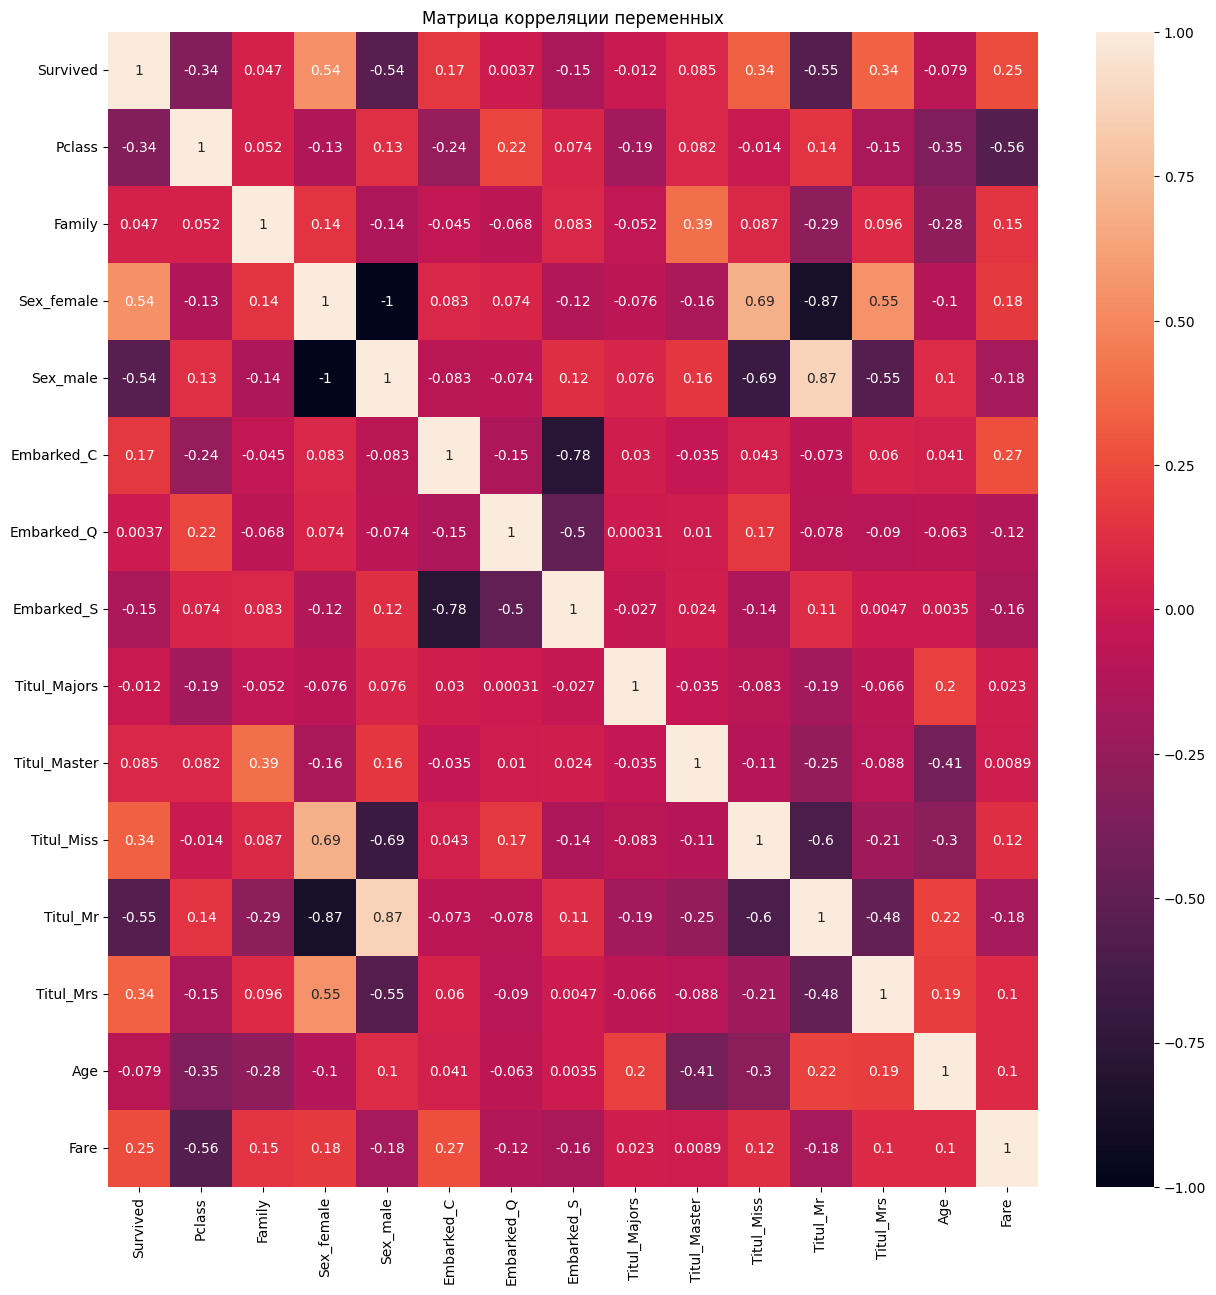

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_titanic.corr(), annot=True)
plt.title('Матрица корреляции переменных')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

# Загрузка данных и определение признаков и целевой переменной
X = data_titanic.drop(columns=['Survived'])
y = data_titanic['Survived']

# Разделение выборки на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, log_loss

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_logreg = logreg.predict(X_test)

# Вычисление метрик классификации
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
log_loss_ = log_loss(y_test, y_pred_logreg)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Log_loss:",log_loss_)

Logistic Regression Metrics:
Accuracy: 0.8212290502793296
Precision: 0.7763157894736842
Recall: 0.7972972972972973
F1-score: 0.7866666666666666
Log_loss: 6.443558147775134


In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Создание и обучение модели KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_knn = knn.predict(X_test)

# Вычисление метрик классификации
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
log_loss_ = log_loss(y_test, y_pred_knn)


print("KNN Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Log_loss:",log_loss_)


KNN Metrics:
Accuracy: 0.7877094972067039
Precision: 0.7571428571428571
Recall: 0.7162162162162162
F1-score: 0.736111111111111
Log_loss: 7.651725300482971


In [41]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели регрессии
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_regression = regression_model.predict(X_test)

# Вычисление метрики r^2
r2 = r2_score(y_test, y_pred_regression)

print("R^2 Score:", r2)

R^2 Score: 0.45350281998917863


На основании предоставленных метрик для модели логистической регрессии, можно сделать следующие выводы:

1. Accuracy (точность): Значение 0.8212 указывает на то, что модель правильно классифицировала около 82% образцов в общей сложности. Она имеет относительно высокую точность.

2. Precision (точность): Значение 0.7763 означает, что из всех предсказанных моделью положительных классов, около 77.63% являются истинно положительными. Это показывает, что модель довольно точна в определении положительных классов.

3. Recall (полнота): Значение 0.7973 указывает, что модель правильно идентифицировала около 79.73% положительных образцов из всех действительно положительных. Это говорит о том, что модель способна хорошо находить положительные образцы.

4. F1-score (F-мера): Значение 0.7867 является гармоническим средним между точностью и полнотой. Он представляет собой общую оценку модели, учитывающую и точность, и полноту. Чем ближе значение F1-меры к 1, тем лучше модель предсказывает.

5. Log_loss (логарифмическая потеря): Значение 6.4436 в данном случае представляет собой меру потери или ошибки модели. Меньшие значения логарифмической потери указывают на лучшую производительность модели, поэтому в данном случае значение 6.4436 может быть считаться высоким.

Общий вывод: Модель логистической регрессии имеет довольно высокую точность и способна достаточно хорошо находить положительные образцы.

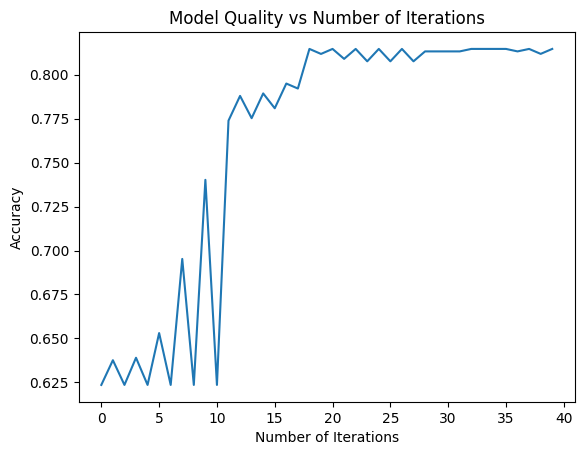

In [61]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

# Определение диапазона гиперпараметров
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=40, cv=5, scoring='accuracy')

# Подгонка модели
random_search.fit(X_train, y_train)

# Получение результатов поиска
results = random_search.cv_results_
best_params = random_search.best_params_
best_score = random_search.best_score_

# Построение графика качества модели
plt.plot(results['mean_test_score'])
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Model Quality vs Number of Iterations')
plt.show()

c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=40. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


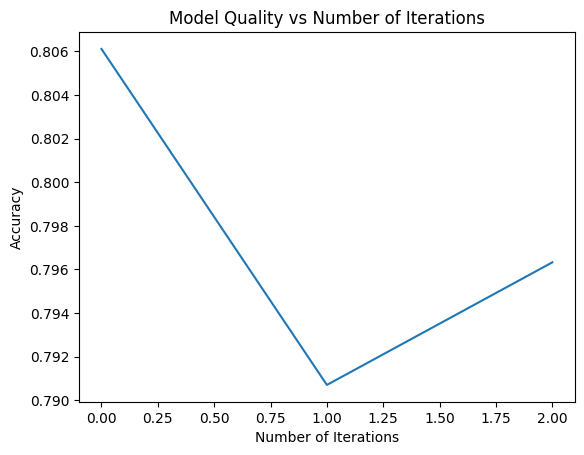

In [65]:

# Выполните RandomizedSearchCV для различного количества итераций
param_grid = {'n_neighbors': [3, 5, 7]}
knn_model = KNeighborsClassifier()
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, 
                                   n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)  

# Получение результатов поиска
results = random_search.cv_results_
best_params = random_search.best_params_
best_score = random_search.best_score_

# Построение графика качества модели
plt.plot(results['mean_test_score'])
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Model Quality vs Number of Iterations')
plt.show()